In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_local')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
# Load example data
data_df = mavenn.load_example_dataset('sortseq_full-wt')

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')
data_df.head()

test N: 10,269
training + validation N: 40,249


,set,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,x
0,validation,2,0,0,0,0,0,0,0,0,0,AATTGATGTCCGGTAGCTCACTCATTAGGCAGCCAAGGTTTTAGAC...
1,training,0,0,0,1,0,0,0,0,0,0,AATTCATGTGAGTTATGTCTCTCATTAGGCACCCCAGGCTTGAGAT...
2,training,1,0,0,0,0,0,0,0,0,0,AATTAATGTGAGTTAGCTCACTCATTGGACACCCCAGGCTTTACAC...
3,training,0,1,0,0,0,0,0,0,0,0,ACTTAATAAAAGTCAGCTCACTCATTAATCACCCCACGCTCTACAT...
4,training,0,0,0,0,0,3,0,0,0,0,AATTAATGTGAGTTATCTAACTCATTAGGCACCCCAGGCTTTACAC...


In [3]:
# Comptue sequence length and number of bins
L = len(data_df['x'][0])
y_cols = data_df.columns[1:-1]
Y = len(y_cols)
print(f'L={L}, Y={Y}')

L=75, Y=10


In [4]:
# define custom gp_map parameters dictionary
gpmap_kwargs = {'TF_start':1,
                'TF_end':27,
                'RNAP_start':34,
                'RNAP_end':75,
                'regularizer':0.1}

# Create model
model = mavenn.Model(L=L, 
                     Y=Y,
                     alphabet='dna', 
                     regression_type='MPA', 
                     gpmap_type='thermodynamic',
                     gpmap_kwargs=gpmap_kwargs,)

In [5]:
# Set training data
model.set_data(x=data_df['x'],
               y=data_df[y_cols],
               validation_flags=(data_df['set']=='validation'),
               shuffle=True)

# Fit model to data
model.fit(learning_rate=.0005,
          epochs=1000,
          batch_size=50,
          early_stopping=True,
          early_stopping_patience=25,
          linear_initialization=True)


N = 40,249 observations set as training data.
Using 24.7% for validation.
Data shuffled.
Time to set data: 0.59 sec.
Epoch 1/1000
607/607 [==============================] - 3s 2ms/step - loss: 197.8920 - I_var: 0.0116 - val_loss: 181.1068 - val_I_var: 0.0346
Epoch 2/1000
607/607 [==============================] - 1s 1ms/step - loss: 174.1092 - I_var: 0.0972 - val_loss: 162.2520 - val_I_var: 0.1665
Epoch 3/1000
607/607 [==============================] - 1s 2ms/step - loss: 157.4116 - I_var: 0.2266 - val_loss: 152.9686 - val_I_var: 0.2630
Epoch 4/1000
607/607 [==============================] - 1s 2ms/step - loss: 150.2542 - I_var: 0.2982 - val_loss: 149.6301 - val_I_var: 0.3075
Epoch 5/1000
607/607 [==============================] - 1s 1ms/step - loss: 147.4420 - I_var: 0.3418 - val_loss: 147.4493 - val_I_var: 0.3537
Epoch 6/1000
607/607 [==============================] - 1s 2ms/step - loss: 144.6195 - I_var: 0.3756 - val_loss: 146.4289 - val_I_var: 0.3808
Epoch 7/1000
607/607 [=========

607/607 [==============================] - 1s 1ms/step - loss: 139.6770 - I_var: 0.5046 - val_loss: 141.3672 - val_I_var: 0.5040
Epoch 58/1000
607/607 [==============================] - 1s 1ms/step - loss: 139.2252 - I_var: 0.5040 - val_loss: 141.5415 - val_I_var: 0.5001
Epoch 59/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.4834 - I_var: 0.5038 - val_loss: 141.4469 - val_I_var: 0.5019
Epoch 60/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.8611 - I_var: 0.5050 - val_loss: 141.3798 - val_I_var: 0.5040
Epoch 61/1000
607/607 [==============================] - 1s 2ms/step - loss: 140.0581 - I_var: 0.5043 - val_loss: 141.5170 - val_I_var: 0.5013
Epoch 62/1000
607/607 [==============================] - 1s 1ms/step - loss: 140.6057 - I_var: 0.5035 - val_loss: 141.4370 - val_I_var: 0.5025
Epoch 63/1000
607/607 [==============================] - 1s 1ms/step - loss: 140.0389 - I_var: 0.5044 - val_loss: 141.4539 - val_I_var: 0.5022
Epoch 64/1000

607/607 [==============================] - 1s 2ms/step - loss: 140.1442 - I_var: 0.5086 - val_loss: 141.2076 - val_I_var: 0.5095
Epoch 115/1000
607/607 [==============================] - 1s 2ms/step - loss: 141.1559 - I_var: 0.5100 - val_loss: 141.2052 - val_I_var: 0.5099
Epoch 116/1000
607/607 [==============================] - 1s 2ms/step - loss: 140.2749 - I_var: 0.5090 - val_loss: 141.1637 - val_I_var: 0.5107
Epoch 117/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.5336 - I_var: 0.5115 - val_loss: 141.2530 - val_I_var: 0.5084
Epoch 118/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.5526 - I_var: 0.5091 - val_loss: 141.2089 - val_I_var: 0.5096
Epoch 119/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.1825 - I_var: 0.5108 - val_loss: 141.1579 - val_I_var: 0.5106
Epoch 120/1000
607/607 [==============================] - 1s 2ms/step - loss: 140.2188 - I_var: 0.5108 - val_loss: 141.0893 - val_I_var: 0.5122
Epoch 1

Epoch 171/1000
607/607 [==============================] - 1s 2ms/step - loss: 140.1289 - I_var: 0.5225 - val_loss: 141.0386 - val_I_var: 0.5204
Epoch 172/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.3186 - I_var: 0.5194 - val_loss: 140.9405 - val_I_var: 0.5225
Epoch 173/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.4195 - I_var: 0.5229 - val_loss: 140.9853 - val_I_var: 0.5211
Epoch 174/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.8471 - I_var: 0.5214 - val_loss: 140.8852 - val_I_var: 0.5241
Epoch 175/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.3519 - I_var: 0.5214 - val_loss: 141.1965 - val_I_var: 0.5176
Epoch 176/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.2920 - I_var: 0.5220 - val_loss: 141.0336 - val_I_var: 0.5204
Epoch 177/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.1448 - I_var: 0.5235 - val_loss: 140.9717 - val_I_var:

Epoch 228/1000
607/607 [==============================] - 1s 2ms/step - loss: 140.0344 - I_var: 0.5289 - val_loss: 140.9274 - val_I_var: 0.5271
Epoch 229/1000
607/607 [==============================] - 1s 2ms/step - loss: 138.9302 - I_var: 0.5298 - val_loss: 140.9329 - val_I_var: 0.5269
Epoch 230/1000
607/607 [==============================] - 1s 2ms/step - loss: 138.6901 - I_var: 0.5301 - val_loss: 141.3454 - val_I_var: 0.5188
Epoch 231/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.1531 - I_var: 0.5298 - val_loss: 140.8443 - val_I_var: 0.5290
Epoch 232/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.4674 - I_var: 0.5291 - val_loss: 140.9156 - val_I_var: 0.5280
Epoch 233/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.3717 - I_var: 0.5272 - val_loss: 140.8146 - val_I_var: 0.5300
Epoch 234/1000
607/607 [==============================] - 1s 2ms/step - loss: 139.7816 - I_var: 0.5297 - val_loss: 141.0680 - val_I_var:

On test data:
I_var_test: 0.521 +- 0.008 bits
I_pred_test: 0.672 +- 0.012 bits


Text(0.5, 1.0, 'training hisotry')

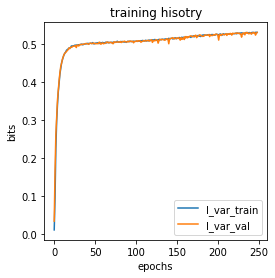

In [6]:
# Show training history
print('On test data:')
x_test = test_df['x'].values
y_test = test_df[y_cols].values

# Compute likelihood information
I_var, dI_var =  model.I_variational(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
#ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
#ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
#ax.set_ylim([0, I_pred*1.2]);

In [7]:
interaction_term = model.get_nn().layers[2].get_weights()[4]
crp_weights = model.get_nn().layers[2].get_weights()[2][0]
rnap_weights = model.get_nn().layers[2].get_weights()[3][0]
print(f'interaction term = {interaction_term[0]:.3f} k_cal/mol')

interaction term = 3.037 k_cal/mol


In [8]:
model.get_nn().layers[2].get_weights()[5]

array([3.375423], dtype=float32)

In [9]:
crp_df = pd.DataFrame(crp_weights,columns=model.alphabet)
rnap_df = pd.DataFrame(rnap_weights,columns=model.alphabet)

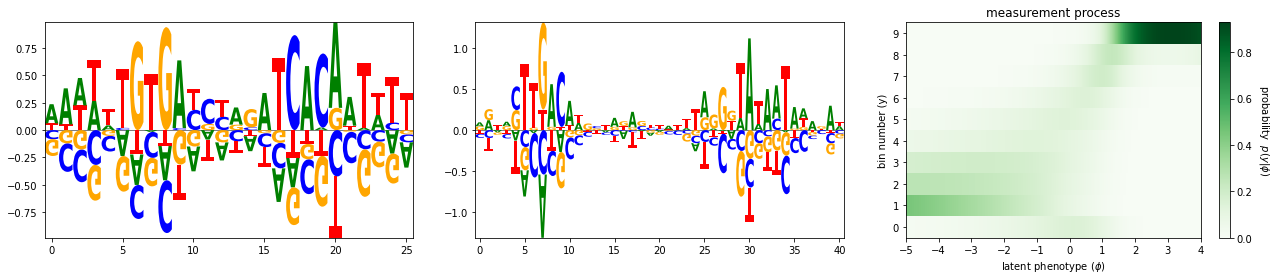

In [11]:
# # Get G-P map parameters in matrix form
# theta = model.get_theta(gauge='uniform')

# Create grid in phi space
phi_lim = [-5, 4]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = model.model.Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values
measurement_process = model.p_of_y_given_phi(y_all, phi_grid)

# # Create figure with two panels
fig, axs = plt.subplots(1,3,figsize=[18,4])

logomaker.Logo(crp_df,ax=axs[0],center_values=True)
logomaker.Logo(rnap_df,ax=axs[1],center_values=True)

# # Right panel: draw measurement process as heatmap
ax = axs[2]
im = ax.imshow(measurement_process,
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process')
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout(w_pad=3)
fig.savefig('thermodynmic_custom_gpmap_mpa_visualization_sort_seq.png',bbox_index='tight',dpi=300)
# plt.show()